In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [199]:
#Get all files CSV
path = r'C:/Users/Youcode/Desktop/Scraping github/data'
all_files = glob.glob(os.path.join(path, "n_repos_*.csv"))

df = pd.concat([pd.read_csv(f) for f in all_files])


#get information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 171396 entries, 0 to 20395
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        171396 non-null  int64 
 1   full_name         171396 non-null  object
 2   url               171396 non-null  object
 3   clone_url         171396 non-null  object
 4   watchers_count    171396 non-null  int64 
 5   stargazers_count  171396 non-null  int64 
 6   language          145800 non-null  object
 7   forks             171396 non-null  int64 
 8   description       117780 non-null  object
 9   type              171396 non-null  object
 10  license           72197 non-null   object
 11  fork              171396 non-null  bool  
 12  created_at        171396 non-null  object
 13  updated_at        171396 non-null  object
 14  pushed_at         171396 non-null  object
dtypes: bool(1), int64(4), object(10)
memory usage: 19.8+ MB


In [200]:
df.describe()

,Unnamed: 0,watchers_count,stargazers_count,forks
count,171396.000000,171396.000000,171396.000000,171396.000000
mean,14536.002649,30.975647,30.975647,4.932758
std,8614.407770,565.045435,565.045435,128.739006
min,0.000000,0.000000,0.000000,0.000000
25%,7141.000000,3.000000,3.000000,0.000000
50%,14282.500000,5.000000,5.000000,0.000000
75%,21630.000000,9.000000,9.000000,2.000000
max,30999.000000,140741.000000,140741.000000,31198.000000


In [201]:
#get names of columns
df.columns

Index(['Unnamed: 0', 'full_name', 'url', 'clone_url', 'watchers_count',
       'stargazers_count', 'language', 'forks', 'description', 'type',
       'license', 'fork', 'created_at', 'updated_at', 'pushed_at'],
      dtype='object')

In [202]:
#Delete culimn unnamed
del df['Unnamed: 0']

In [203]:
df.shape

(171396, 14)

In [204]:
#get sum of value null by column
df.isnull().sum()

full_name               0
url                     0
clone_url               0
watchers_count          0
stargazers_count        0
language            25596
forks                   0
description         53616
type                    0
license             99199
fork                    0
created_at              0
updated_at              0
pushed_at               0
dtype: int64

<h3>Language<h3>

In [205]:
#Drop all row if language column is null

df.dropna(subset=['language'],inplace=True)

<h3>Description</h3>

In [209]:
#Replace alldescription null

df['description'].fillna('No Description', inplace=True)

In [222]:
#!pip install emoji

In [231]:
import emoji
import re

#Replace all description content just emoji

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [245]:
#Clean description : Delete imojis

df['description'].apply(remove_emoji)

0                           A book that teaches JavaScript
2        LinksHub aims to provide developers with acces...
3        This repository is a Challenge for the DevOps ...
5        A custom view build with Obsidian-Dataview to ...
6        Some of the scripts I use for scribepod @ http...
                               ...                        
20390                  HackerRank Python Problem Solutions
20391                                       No Description
20392    Repository for the simple local web applicatio...
20393                                 Hangman GAme in C++!
20394                                       No Description
Name: description, Length: 145800, dtype: object

In [3]:
for l in df['description']:
    print(emoji.distinct_emoji_list())

NameError: name 'df' is not defined

<h3>License<h3>

In [178]:
#Replace all license null

df['license'].fillna('No License',inplace=True)

In [179]:
#calculat sum of duplicated rows

df.duplicated().sum()

847

In [180]:
df.drop_duplicates(inplace=True)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144953 entries, 0 to 20394
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   full_name         144953 non-null  object
 1   url               144953 non-null  object
 2   clone_url         144953 non-null  object
 3   watchers_count    144953 non-null  int64 
 4   stargazers_count  144953 non-null  int64 
 5   language          144953 non-null  object
 6   forks             144953 non-null  int64 
 7   description       144953 non-null  object
 8   type              144953 non-null  object
 9   license           144953 non-null  object
 10  fork              144953 non-null  bool  
 11  created_at        144953 non-null  object
 12  updated_at        144953 non-null  object
 13  pushed_at         144953 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 15.6+ MB


In [95]:
#Creat two indexs for culumns type numeric and categories
num_repositories_columns = df.select_dtypes(include=['int64','float64']).columns
cat_repositories_columns = df.select_dtypes(include='object').columns

In [182]:
#!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()

In [183]:
#convert columns datatype category to data type numeric
for i in num_repositories_columns:
    df[i] = scale.fit_transform(df[i])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144953 entries, 0 to 20394
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   full_name         144953 non-null  object
 1   url               144953 non-null  object
 2   clone_url         144953 non-null  object
 3   watchers_count    144953 non-null  int64 
 4   stargazers_count  144953 non-null  int64 
 5   language          144953 non-null  object
 6   forks             144953 non-null  int64 
 7   description       144953 non-null  object
 8   type              144953 non-null  object
 9   license           144953 non-null  object
 10  fork              144953 non-null  bool  
 11  created_at        144953 non-null  object
 12  updated_at        144953 non-null  object
 13  pushed_at         144953 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 15.6+ MB


In [147]:
#Convert datetime to date
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df['updated_at'] = pd.to_datetime(df['created_at']).dt.date
df['pushed_at'] = pd.to_datetime(df['created_at']).dt.date

df.head().sort_values('forks',ascending=False)

,full_name,url,clone_url,watchers_count,stargazers_count,language,forks,description,type,license,fork,created_at,updated_at,pushed_at
3,LondheShubham153/90DaysOfDevOps,https://github.com/LondheShubham153/90DaysOfDe...,https://github.com/LondheShubham153/90DaysOfDe...,341,341,Python,457,This repository is a Challenge for the DevOps ...,User,"{'key': 'other', 'name': 'Other', 'spdx_id': '...",False,2023-01-01,2023-01-01,2023-01-01
2,rupali-codes/LinksHub,https://github.com/rupali-codes/LinksHub,https://github.com/rupali-codes/LinksHub.git,346,346,TypeScript,262,LinksHub aims to provide developers with acces...,User,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",False,2023-01-01,2023-01-01,2023-01-01
0,sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript.git,577,577,HTML,31,A book that teaches JavaScript,User,"{'key': 'apache-2.0', 'name': 'Apache License ...",False,2023-01-01,2023-01-01,2023-01-01
6,yacineMTB/scribepod,https://github.com/yacineMTB/scribepod,https://github.com/yacineMTB/scribepod.git,145,145,Jupyter Notebook,14,Some of the scripts I use for scribepod @ http...,User,NaN,False,2023-01-01,2023-01-01,2023-01-01
5,702573N/Obsidian-Tasks-Timeline,https://github.com/702573N/Obsidian-Tasks-Time...,https://github.com/702573N/Obsidian-Tasks-Time...,163,163,JavaScript,13,A custom view build with Obsidian-Dataview to ...,User,NaN,False,2023-01-01,2023-01-01,2023-01-01


In [148]:
#get languages more utilised
df.groupby('language')['language'].count().sort_values(ascending=False)

language
Python        27135
JavaScript    19764
TypeScript    14078
HTML           7331
Java           6366
              ...  
Slice             1
Slash             1
COBOL             1
Nushell           1
Jasmin            1
Name: language, Length: 310, dtype: int64

In [150]:
#Calculat outlier of watchers|forks

w_Q1=df['watchers_count'].quantile(0.25)
w_Q3=df['watchers_count'].quantile(0.75)

w_IQR=w_Q3-w_Q1

w_Lower_Whisker = w_Q1 - 1.5 * w_IQR
w_Upper_Whisker = w_Q3 + 1.5 * w_IQR

f_Q1=df['forks'].quantile(0.25)
f_Q3=df['forks'].quantile(0.75)

f_IQR=f_Q3-f_Q1

f_Lower_Whisker = f_Q1 - 1.5 * f_IQR
f_Upper_Whisker = f_Q3 + 1.5 * f_IQR

print(w_Lower_Whisker,f_Lower_Whisker,f_Upper_Whisker, w_Upper_Whisker)

-7.0 -3.0 5.0 17.0


In [151]:
print(len(df.loc[df['watchers_count'] < w_Lower_Whisker]),len(df.loc[df['watchers_count'] > w_Upper_Whisker]))

0 17711


In [152]:
#separation outliers in other dataframe

watchers_outliers_df = df.loc[(df['watchers_count'] < w_Lower_Whisker) | (df['watchers_count'] > w_Upper_Whisker)]

forks_outliers_df = df.loc[(df['forks'] < f_Lower_Whisker) | (df['forks'] > f_Upper_Whisker)]

display(df['language'].value_counts(),watchers_outliers_df['language'].value_counts())


language
Python          27135
JavaScript      19764
TypeScript      14078
HTML             7331
Java             6366
                ...  
Pony                1
SMT                 1
REXX                1
UnrealScript        1
APL                 1
Name: count, Length: 310, dtype: int64

language
Python        5205
TypeScript    2174
JavaScript    1628
Go             841
Rust           792
              ... 
ASL              1
Jsonnet          1
mcfunction       1
Fortran          1
Hy               1
Name: count, Length: 157, dtype: int64

In [154]:
#Create two file csv for insert all values without : watchers | forks
df.loc[(df['watchers_count'] > w_Lower_Whisker) & (df['watchers_count'] < w_Upper_Whisker)].to_csv('data/data_cleaned/data_without_watchers_outliers.csv')
df.loc[(df['forks'] > f_Lower_Whisker) & (df['forks'] < f_Upper_Whisker)].to_csv('data/data_cleaned/data_without_forks_outliers.csv')

In [155]:
#Create two file csv for insert all values outliers : watchers | forks
df.loc[(df['watchers_count'] < w_Lower_Whisker) & (df['watchers_count'] > w_Upper_Whisker)].to_csv('data/data_cleaned/watchers_outliers.csv')
df.loc[(df['forks'] < f_Lower_Whisker) & (df['forks'] > f_Upper_Whisker)].to_csv('data/data_cleaned/forks_outliers.csv')

In [156]:
#Read data without watchers | forks ouliers
df_without_watchers = pd.read_csv('data/data_cleaned/data_without_watchers_outliers.csv')
df_without_forks = pd.read_csv('data/data_cleaned/data_without_forks_outliers.csv')


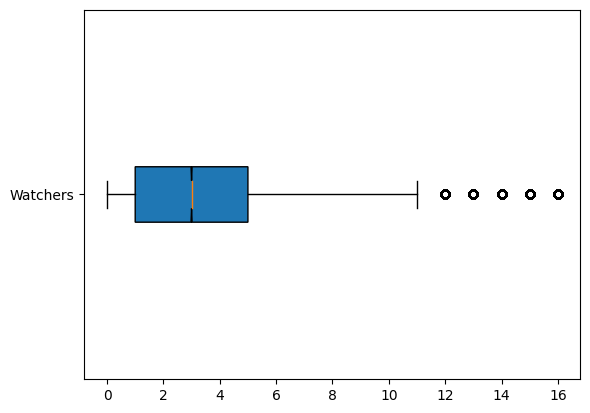

In [157]:
w_boxblot = plt.boxplot(
    df_without_watchers['watchers_count'],
    notch=True,  # notch shape
    vert=False,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=['Watchers']
)

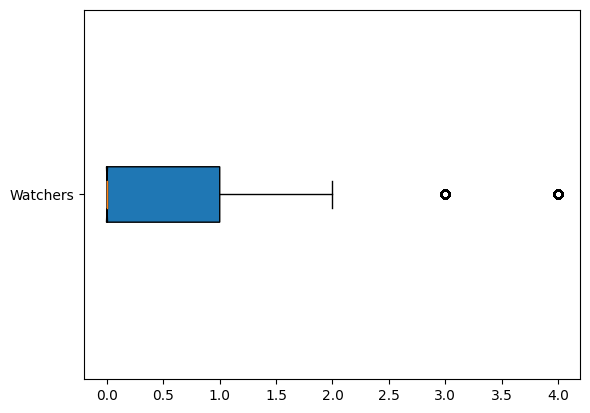

In [158]:

w_boxblot = plt.boxplot(
    df_without_forks['forks'],
    notch=True,  # notch shape
    vert=False,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=['Watchers']
)

0

Trending repositories :

In [125]:
#chargement dataframe : trending repo
df_trending = pd.read_csv('trending_2023_06_16.csv',index_col=0)
df_languages_trending = pd.read_csv('languages_trending_2023_06_16.csv',index_col=0)

In [126]:
df_trending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25 non-null     object
 1   link    25 non-null     object
 2   stars   25 non-null     object
 3   forks   25 non-null     object
dtypes: object(4)
memory usage: 1000.0+ bytes


In [127]:
#get name of columns for normalizing
cat_trending_columns = df_trending.loc[:,['forks','stars']].columns
cat_trending_columns

Index(['forks', 'stars'], dtype='object')

In [128]:
#loop for normalize columns of type Object to Int
for i in cat_trending_columns:
    df_trending[i] = scale.fit_transform(df_trending[i])

In [129]:
df_trending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25 non-null     object
 1   link    25 non-null     object
 2   stars   25 non-null     int32 
 3   forks   25 non-null     int32 
dtypes: int32(2), object(2)
memory usage: 800.0+ bytes


In [131]:
df_trending.isna().sum()

label    0
link     0
stars    0
forks    0
dtype: int64

In [130]:
df_trending.duplicated().sum()

0

In [124]:
df_languages_trending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         126 non-null    object
 1   lang_name  126 non-null    object
 2   lines      126 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [7]:
df_trending.describe()

,label,link,stars,forks
count,25,25,25,25
unique,25,25,25,25
top,StanGirard/quivr,https://github.com/StanGirard/quivr,"7,694",963
freq,1,1,1,1


In [370]:
df_trending.isna().sum()

label    0
link     0
stars    0
forks    0
dtype: int64

In [368]:
df_languages_trending.isna().sum()

id           0
lang_name    0
lines        0
dtype: int64

In [371]:

#df_languages_trending.groupby(['id'])['lang_name'].apply(lambda x : x)

df_languages_trending

,id,lang_name,lines
0,StanGirard/quivr,TypeScript,108271
1,StanGirard/quivr,Python,85923
2,StanGirard/quivr,JavaScript,6319
3,StanGirard/quivr,PLpgSQL,4072
4,StanGirard/quivr,Dockerfile,1626
...,...,...,...
121,ordinals/ord,CSS,8662
122,ordinals/ord,Just,4842
123,ordinals/ord,JavaScript,1446
124,ordinals/ord,Python,1124
